In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load the dataset
data = pd.read_csv('cities_r2.csv')
data.shape

(493, 22)

In [3]:
data.head(10)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
5,Agartala,16,TRIPURA,1,399688,199616,200072,33635,17341,16294,...,169109,1002,940,93.88,95.75,92.02,"23.831457,91.2867777",52711,30215,22496
6,Agra,9,UTTAR PRADESH,15,1574542,849771,724771,186516,105279,81237,...,376725,853,772,63.44,67.67,58.54,"27.1766701,78.0080745",185813,106082,79731
7,Ahmadabad,24,GUJARAT,7,5570585,2935869,2634716,589076,317917,271159,...,2004480,897,853,89.62,93.96,84.81,"23.022505,72.5713621",769858,435267,334591
8,Ahmadnagar,27,MAHARASHTRA,26,350905,179755,171150,36712,19748,16964,...,134649,952,859,91.49,95.51,87.33,"19.0952075,74.7495916",51661,29832,21829
9,Aizawl,15,MIZORAM,3,291822,143803,148019,35147,17667,17480,...,128332,1029,989,98.80,99.30,98.31,"23.727107,92.7176389",26832,14900,11932


In [4]:
data.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [5]:
data.dtypes

name_of_city                       object
state_code                          int64
state_name                         object
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                           object
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [6]:
# Encode categorical variables if necessary
cols = ['name_of_city', 'state_name', 'location']
le = LabelEncoder()
for column in cols:
    data[column] = le.fit_transform(data[column])

In [7]:
data.dtypes

name_of_city                        int64
state_code                          int64
state_name                          int64
dist_code                           int64
population_total                    int64
population_male                     int64
population_female                   int64
0-6_population_total                int64
0-6_population_male                 int64
0-6_population_female               int64
literates_total                     int64
literates_male                      int64
literates_female                    int64
sex_ratio                           int64
child_sex_ratio                     int64
effective_literacy_rate_total     float64
effective_literacy_rate_male      float64
effective_literacy_rate_female    float64
location                            int64
total_graduates                     int64
male_graduates                      int64
female_graduates                    int64
dtype: object

In [8]:
# SELECTING THE FEATUE TO BUILD K-MEANS MODEL
# HERE 'total_graduates'
X = data[['total_graduates']]

In [9]:
# NORMALIZING THE DATA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

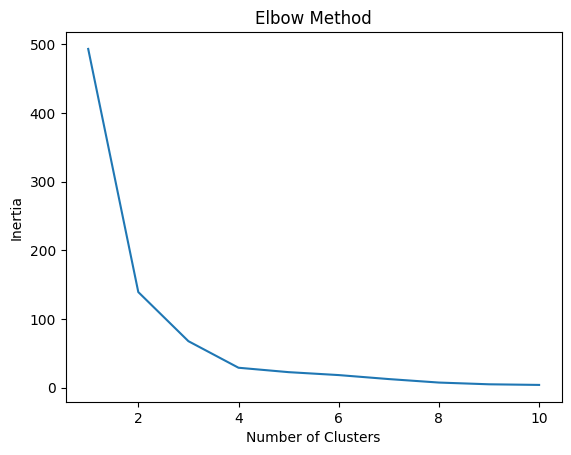

In [14]:
# Elbow method to determine optimal clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [11]:
# BUILD K-MEANS MODEL BASED ON ELBOW NUMBER
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# STORE PREDICTED CLASS IN A NEW COLUMN
data['cluster'] = kmeans.fit_predict(X_scaled)

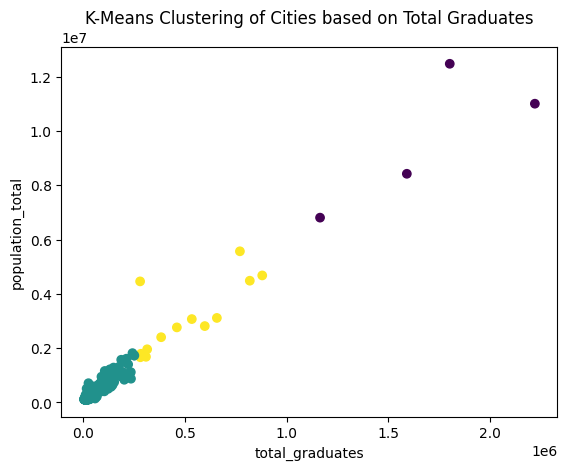

In [18]:
plt.scatter(data['total_graduates'], data['population_total'], c=data['cluster'], cmap='viridis')
plt.xlabel('total_graduates')
plt.ylabel('population_total')
plt.title('K-Means Clustering of Cities based on Total Graduates')
plt.show()

In [16]:
cluster_summary = data.groupby('cluster')['effective_literacy_rate_total'].describe()
print(cluster_summary)

         count       mean       std    min     25%     50%      75%    max
cluster                                                                   
0          4.0  87.607500  3.300095  82.96  86.440  88.595  89.7625  90.28
1        476.0  85.032815  6.246796  49.51  81.675  85.930  89.2950  98.80
2         13.0  87.981538  3.242619  84.14  84.720  87.380  90.3300  93.13
